# EOD
### Exploratory data analysis

### For mapping - Folium
* https://georgetsilva.github.io/posts/mapping-points-with-folium/
* https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data
* http://andrewgaidus.com/leaflet_webmaps_python/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

import seaborn as sns
import json

# specifies number of rows to show
pd.set_option('display.max_rows', 300) 

# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.4f}'.format 

# specifies that graphs should use ggplot styling
plt.style.use('ggplot') 
%matplotlib inline

from pandas.io.json import json_normalize

import folium
from folium.plugins import HeatMap

# Read a region .csv

In [39]:
os.chdir('D:\\Documentos\\GitHub\\CityBlender\\data-analysis\\CSVs')

In [40]:
df = pd.read_csv('americas.csv', encoding='ISO-8859-1')

In [41]:
len(df['location'])

1847

In [42]:
# Make a dictionary using list comprehension
df['location'] = [ast.literal_eval(df['location'][x]) for x in range(len(df['location']))]
df['venue_name'] = [ast.literal_eval(df['venue'][x])['displayName'] for x in range(len(df['venue']))]
df['performance'] = [(ast.literal_eval(df['performance'][x])) for x in range(len(df['performance']))]


# Make the list of Cities
df['city'] = [df['location'][x]['city'] for x in range(len(df['location']))]
df['lat'] = [df['location'][x]['lat'] for x in range(len(df['location']))]
df['lng'] = [df['location'][x]['lng'] for x in range(len(df['location']))]



In [ ]:
q_artist_per_gig = []
for fila in range(len(df['performance'])):
    
    # And then get inside the cell dictionary and cheque what's inside there
    for in_cell in range(len(df['performance'][fila])):
        q_artist_per_gig.append(len(df['performance'][fila]))
print(max(q_artist_per_gig))
        

(array([1779.,  723.,  380.,  259.,   77.,   40.,   38.,   11.,    0.,
          27.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

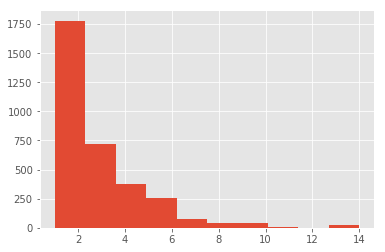

In [123]:
plt.hist(q_artist_per_gig)

# create the variables

In [207]:
# Get inside the performance list
artistas = pd.DataFrame([])

for fila in range(len(df['performance'])):
    
    # And then get inside the cell dictionary and cheque what's inside there
    for in_cell in range(len(df['performance'][fila])):
        artistas.loc[fila, 'groupName_' + str(in_cell)] = df['performance'][fila][in_cell]['artist']['displayName']
        artistas.loc[fila, 'groupID_' + str(in_cell)] = df['performance'][fila][in_cell]['artist']['id']
       

In [208]:
artistas

,groupName_0,groupID_0,groupName_1,groupID_1,groupName_2,groupID_2,groupName_3,groupID_3,groupName_4,groupID_4,...,groupName_9,groupID_9,groupName_10,groupID_10,groupName_11,groupID_11,groupName_12,groupID_12,groupName_13,groupID_13
0,Alex Ferreira,"671,377.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
1,Los Caligaris,"20,860.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
2,galindez,"8,047,018.0000",Primattes,"8,723,629.0000",Fraccion 32,"9,386,399.0000",NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
3,Samuel Levi y Los Niños Perdidos,"9,115,299.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
4,Nicolás Mateo,"8,841,744.0000",El asesino del romance,"9,198,199.0000",Franco Dolzani,"9,421,779.0000",NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
5,los tabaleros,"8,901,944.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
6,Bandera de Niebla,"8,259,008.0000",Funerales,"8,310,073.0000",Tomografia Bonaerense,"9,430,644.0000",NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
7,Dalmiro y los de Nieve,"9,431,679.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
8,La cara de los últimos,"8,602,374.0000",Charlie Desidney,"9,434,244.0000",NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
9,Mezclas Raras,"9,437,324.0000",NaN,nan,NaN,nan,NaN,nan,NaN,nan,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan


In [212]:
df = df.merge(artistas, left_index = True, right_index = True, how='outer')

# This is for mapping

In [6]:
# Get rid of the Nan
df = df[df['lat'].notnull()]
df = df.reset_index()
del df['index']
del df['Unnamed: 0']

# Subset

In [7]:
ba = df[df['city']=='Buenos Aires, Argentina']
ba = ba.reset_index()

In [8]:
locations = ba[['lat', 'lng']]
locationlist = locations.values.tolist()

In [9]:
locationlist[1]

[-34.5875, -58.6725]

In [10]:
map = folium.Map(location = [-34.5875, -58.6725],
                 tiles= 'stamenwatercolor',
                 zoom_start=10)

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=3, 
                        fill = True,
                        fill_color='black',
                        line_color='black',
                        color = 'black',
                        fill_opacity=0.7,
                        popup=ba['venue_name'][point]).add_to(map)
    
HeatMap(locationlist).add_to(map)
map

In [11]:
map.save('first_map.html') #save HTML

In [13]:
df.columns

Index(['ageRestriction', 'displayName', 'end', 'id', 'location', 'performance',
       'popularity', 'series', 'start', 'status', 'type', 'uri', 'venue',
       'city', 'lat', 'lng', 'venue_name'],
      dtype='object')

In [21]:
for i in range(len(df['performance'])):
    print('*******************')
    print(i)
    print(ast.literal_eval(df['performance'][i]))
    print('*******************')
    
    
    

*******************
0
[{'billing': 'headline', 'displayName': 'Alex Ferreira', 'artist': {'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:bdc48245-c1a6-49b7-aa1f-90271f118e81.json', 'mbid': 'bdc48245-c1a6-49b7-aa1f-90271f118e81'}], 'displayName': 'Alex Ferreira', 'uri': 'http://www.songkick.com/artists/671377-alex-ferreira?utm_source=48067&utm_medium=partner', 'id': 671377}, 'billingIndex': 1, 'id': 62475179}]
*******************
*******************
1
[{'billing': 'headline', 'displayName': 'Los Caligaris', 'artist': {'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:34e43e84-c3ed-4d2a-a7af-d84b269b3a54.json', 'mbid': '34e43e84-c3ed-4d2a-a7af-d84b269b3a54'}], 'displayName': 'Los Caligaris', 'uri': 'http://www.songkick.com/artists/20860-los-caligaris?utm_source=48067&utm_medium=partner', 'id': 20860}, 'billingIndex': 1, 'id': 62640944}]
*******************
*******************
2
[{'displayName': 'galindez', 'billingIndex': 1, 'billing': 'headline

336
[{'displayName': 'Martin Taylor', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Martin Taylor', 'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:92ebb02d-2906-4a6d-9e43-21e16b877fa1.json', 'mbid': '92ebb02d-2906-4a6d-9e43-21e16b877fa1'}], 'uri': 'http://www.songkick.com/artists/468409-martin-taylor?utm_source=48067&utm_medium=partner', 'id': 468409}, 'id': 62902489}]
*******************
*******************
337
[{'displayName': 'Jake Tavill', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Jake Tavill', 'identifier': [], 'uri': 'http://www.songkick.com/artists/6670339-jake-tavill?utm_source=48067&utm_medium=partner', 'id': 6670339}, 'id': 62935579}]
*******************
*******************
338
[{'displayName': 'Eliane Elias', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Eliane Elias', 'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:de981f1a-90bd-42c1-a0ba-295d816b314c.json',

[{'displayName': 'Pharoah Sanders', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Pharoah Sanders', 'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:b3a0912a-a62a-4388-9368-7cb21ed5caf9.json', 'mbid': 'b3a0912a-a62a-4388-9368-7cb21ed5caf9'}], 'uri': 'http://www.songkick.com/artists/421297-pharoah-sanders?utm_source=48067&utm_medium=partner', 'id': 421297}, 'id': 62253519}]
*******************
*******************
837
[{'displayName': 'Arnan Raz', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Arnan Raz', 'identifier': [], 'uri': 'http://www.songkick.com/artists/5555778-arnan-raz?utm_source=48067&utm_medium=partner', 'id': 5555778}, 'id': 62358799}]
*******************
*******************
838
[{'displayName': 'QNA', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'QNA', 'identifier': [], 'uri': 'http://www.songkick.com/artists/9110199-qna?utm_source=48067&utm_medium=partner', 'id': 9110199}, 'id': 62364

*******************
1338
[{'displayName': 'Traxamillion', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Traxamillion', 'identifier': [{'href': 'http://api.songkick.com/api/3.0/artists/mbid:f4ee6ab8-8144-417c-8999-0df29d2a162c.json', 'mbid': 'f4ee6ab8-8144-417c-8999-0df29d2a162c'}], 'uri': 'http://www.songkick.com/artists/324513-traxamillion?utm_source=48067&utm_medium=partner', 'id': 324513}, 'id': 63891509}, {'displayName': 'Smasheltooth', 'billingIndex': 2, 'billing': 'support', 'artist': {'displayName': 'Smasheltooth', 'identifier': [], 'uri': 'http://www.songkick.com/artists/3710661-smasheltooth?utm_source=48067&utm_medium=partner', 'id': 3710661}, 'id': 63891504}]
*******************
*******************
1339
[{'displayName': 'Eric Lilavois', 'billingIndex': 1, 'billing': 'headline', 'artist': {'displayName': 'Eric Lilavois', 'identifier': [], 'uri': 'http://www.songkick.com/artists/3680976-eric-lilavois?utm_source=48067&utm_medium=partner', 'id': 3680976}, '

In [35]:
len(ast.literal_eval(df['performance'][2]))

3

In [27]:
ast.literal_eval(df['performance'][2])

[{'artist': {'displayName': 'galindez',
   'id': 8047018,
   'identifier': [],
   'uri': 'http://www.songkick.com/artists/8047018-galindez?utm_source=48067&utm_medium=partner'},
  'billing': 'headline',
  'billingIndex': 1,
  'displayName': 'galindez',
  'id': 62908664},
 {'artist': {'displayName': 'Primattes',
   'id': 8723629,
   'identifier': [],
   'uri': 'http://www.songkick.com/artists/8723629-primattes?utm_source=48067&utm_medium=partner'},
  'billing': 'headline',
  'billingIndex': 2,
  'displayName': 'Primattes',
  'id': 62908669},
 {'artist': {'displayName': 'Fraccion 32',
   'id': 9386399,
   'identifier': [],
   'uri': 'http://www.songkick.com/artists/9386399-fraccion-32?utm_source=48067&utm_medium=partner'},
  'billing': 'headline',
  'billingIndex': 3,
  'displayName': 'Fraccion 32',
  'id': 62908674}]

In [34]:
ast.literal_eval(df['performance'][2])[0]

{'artist': {'displayName': 'galindez',
  'id': 8047018,
  'identifier': [],
  'uri': 'http://www.songkick.com/artists/8047018-galindez?utm_source=48067&utm_medium=partner'},
 'billing': 'headline',
 'billingIndex': 1,
 'displayName': 'galindez',
 'id': 62908664}

In [36]:
ast.literal_eval(df['performance'][2])[1]

{'artist': {'displayName': 'Primattes',
  'id': 8723629,
  'identifier': [],
  'uri': 'http://www.songkick.com/artists/8723629-primattes?utm_source=48067&utm_medium=partner'},
 'billing': 'headline',
 'billingIndex': 2,
 'displayName': 'Primattes',
 'id': 62908669}

In [37]:
ast.literal_eval(df['performance'][2])[2]


{'artist': {'displayName': 'Fraccion 32',
  'id': 9386399,
  'identifier': [],
  'uri': 'http://www.songkick.com/artists/9386399-fraccion-32?utm_source=48067&utm_medium=partner'},
 'billing': 'headline',
 'billingIndex': 3,
 'displayName': 'Fraccion 32',
 'id': 62908674}

In [38]:
ast.literal_eval(df['performance'][2])[3]


IndexError: list index out of range